#### Run and understand `pytao_basic_examples.ipynb` first !!

## Tao initialization

In [1]:
from pytao import Tao

In [2]:
# This activates tao, and a plot window (with Xquartz) should pop up.
# If this crashes the kernel, try again with -noplot option below.
tao = Tao('-init tao.init')

#tao = Tao('-init tao.init -noplot')

## Turn on the beam
#### An artificial beam is defined in `tao.init`.
#### Loading in a user-defined beam will be demonstrated in the LCLS-live example.
#### Detailed examples available at:
#### 'https://bmad-sim.github.io/pytao/examples/bunch/'

In [3]:
%%tao
beamon

-------------------------
Tao> beamon
-------------------------
Tao> 


In [4]:
%%tao
sho beam END

-------------------------
Tao> sho beam END
Bunch parameters at: END (24)
  Parameters for bunch:       1
  S-position:                   5.80000000E+00
  In branch:                  0
  Particles surviving:        10000
  Particles lost:             0
  Particles lost (%):         .000
  Charge live (C):              1.00000000E-10
  Centroid: -1.53390477E-08  2.81266548E-15 -2.31772935E-14  1.30976852E-12 -2.85646551E-07 -1.58696627E-21
  RMS:       7.80058621E-04  1.01160011E-04  2.98761969E-04  1.89268829E-04  6.05652142E-04  1.00000000E-03

               norm_emitt            emit            beta           alpha
  a:         1.00000552E-06  5.11670244E-08  8.72578680E+00 -8.61463092E-01
  b:         9.99999618E-07  5.11667224E-08  1.27997205E+00 -3.45192864E-01
  x:         1.00000396E-06  5.11669447E-08  1.18922765E+01 -1.17407228E+00
  y:         1.00000121E-06  5.11668041E-08  1.74446530E+00 -4.70454867E-01
  z:         1.17181478E-05  5.99579443E-07  6.11786348E-01

Sigma Mat

In [5]:
stats = tao.bunch_params('end')
stats

{'beta_x': 11.8922764508297,
 'alpha_x': -1.17407228081764,
 'gamma_x': 0.199999195311205,
 'phi_x': 0.0,
 'eta_x': -1.34831906095454e-07,
 'etap_x': -1.17245489269297e-09,
 'sigma_x': 0.000780058620668074,
 'sigma_p_x': 0.000101160010721901,
 'emit_x': 5.11669447136107e-08,
 'norm_emit_x': 1.00000396288335e-06,
 'beta_y': 1.7444653031207,
 'alpha_y': -0.470454867337781,
 'gamma_y': 0.700115834930597,
 'phi_y': 0.0,
 'eta_y': 2.17558931954453e-06,
 'etap_y': -4.98449909158126e-07,
 'sigma_y': 0.000298761969411354,
 'sigma_p_y': 0.000189268829314644,
 'emit_y': 5.11668040670539e-08,
 'norm_emit_y': 1.00000121409475e-06,
 'beta_z': 0.611786347633854,
 'alpha_z': -0.142685359825218,
 'gamma_z': 1.66783570090244,
 'phi_z': 0.0,
 'eta_z': 0.0,
 'etap_z': 0.0,
 'sigma_z': 0.000605652142193026,
 'sigma_p_z': 0.00100000000000008,
 'emit_z': 5.99579442662776e-07,
 'norm_emit_z': 1.17181477628206e-05,
 'beta_a': 8.7257868021372,
 'alpha_a': -0.861463091829145,
 'gamma_a': 0.146747172545764,
 'ph

In [6]:
stats['beam_saved']

True

### x coordinate of the first 10 particles

In [7]:
tao.bunch1('end', 'x')[0:10]

array([ 3.04912320e-07, -7.40479375e-04,  7.41642587e-04, -3.48191798e-04,
        1.26604057e-03, -3.94364534e-04, -5.21419469e-04,  4.21812874e-05,
       -7.50067730e-05, -8.69976494e-04])

### Plotting

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
xdat = tao.bunch1('end', 'x')
pxdat = tao.bunch1('end', 'px')
chargedat = tao.bunch1('end', 'charge')

xdata = 1000*xdat
ydata = 1000*pxdat
weights = chargedat

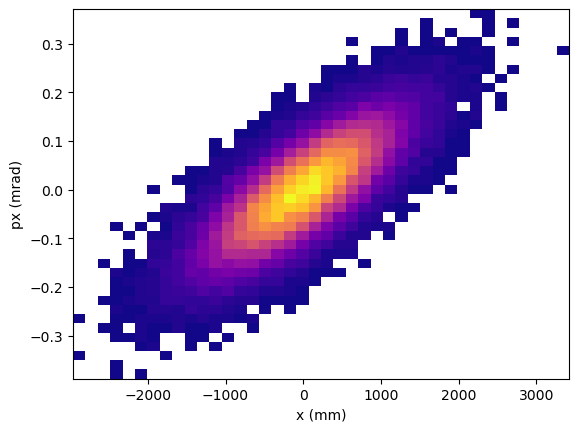

In [10]:
# hist2d

mycmap = plt.get_cmap('plasma') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1e-30 # something tiny
# Bin particles
plt.hist2d(x=1000*xdata, y=ydata,  bins=2*[40], weights=weights, cmap=mycmap, vmin=myvmin)
plt.xlabel('x (mm)')
plt.ylabel('px (mrad)')
plt.show()

In [11]:
s = tao.bunch_comb('s')
mean_x = tao.bunch_comb('x')
max_x = mean_x + tao.bunch_comb('rel_max.1')
min_x = mean_x + tao.bunch_comb('rel_min.1')
sigma_x = np.sqrt(tao.bunch_comb('sigma.11'))
fig, ax = plt.subplots()

ax.fill_between(s, min_x, max_x, alpha=0.2)
ax.plot(s, sigma_x, label=r'$+\sigma_x$')
ax.plot(s, mean_x, label=r'$<x>$', marker='.')
ax.plot(s, -sigma_x, label=r'$-\sigma_x$')
ax.set_xlabel('s (m)')
ax.set_ylabel('beam sizes (m)')
plt.legend()

RuntimeError: ERROR detected: [ERROR | 2023-FEB-06 00:59:45] tao_python_cmd:
    "python bunch_comb -array_out s @ 1": COMB_DS_SAVE NOT POSITIVE.
INVALID

In [16]:
s = tao.bunch_comb('s')

RuntimeError: ERROR detected: [ERROR | 2023-FEB-04 20:57:13] tao_python_cmd:
    "python bunch_comb -array_out s @ 1": COMB_DS_SAVE NOT POSITIVE.
INVALID